# Predicting delivery time of food by applying Simple Linear Regression Machine learning model.

## Delivery_time -> Predict delivery time using sorting time 

# ---------------------------------------------------------------

### Delivery time is dependent on sorting time.

In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import os
os.chdir("/home/prathikm/Desktop/ds_assignments/completed/simple_linear_regression")
Time2 = pd.read_csv("delivery_time.csv")
Time2.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Data-Exploration & Renaming the columns as there is space in the names, causes issues while fitting the model

In [3]:
#df2 = df.rename({'a': 'X', 'b': 'Y'}, axis=1) 
Time = Time2.rename({'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'}, axis =1)

In [4]:
Time

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
Time.shape

(21, 2)

In [6]:
Time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
Time.isnull().sum() #No null values

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [8]:
Time.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Correlation co-efficient

In [9]:
Time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [10]:
#Both variables are positively correlated

### Plotting variables to check distribution

/home/prathikm/miniconda3/envs/ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

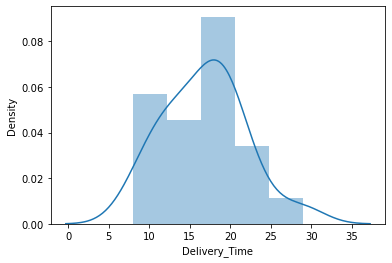

In [11]:
sns.distplot(Time['Delivery_Time'])

/home/prathikm/miniconda3/envs/ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

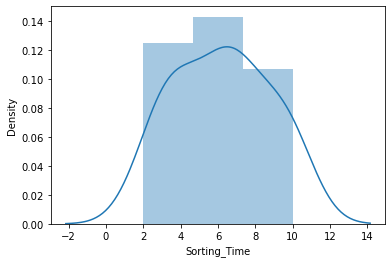

In [12]:
sns.distplot(Time['Sorting_Time'])

## Transformation for moderate positive skewed data for dataset:

## 1. Square Root Transformation - We get Accuracy 0.729

In [81]:
import numpy as np

In [82]:
Time.insert(len(Time.columns), 'D_Sqrt', np.sqrt(Time.iloc[:,0]))
Time.insert(len(Time.columns), 'S_Sqrt', np.sqrt(Time.iloc[:,1]))

In [83]:
Time

,Delivery_Time,Sorting_Time,D_Sqrt,S_Sqrt
0,21.00,10,4.582576,3.162278
1,13.50,4,3.674235,2.000000
2,19.75,6,4.444097,2.449490
3,24.00,9,4.898979,3.000000
4,29.00,10,5.385165,3.162278
5,15.35,6,3.917908,2.449490
6,19.00,7,4.358899,2.645751
7,9.50,3,3.082207,1.732051
8,17.90,10,4.230839,3.162278
9,18.75,9,4.330127,3.000000


/home/prathikm/miniconda3/envs/ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='D_Sqrt', ylabel='Density'>

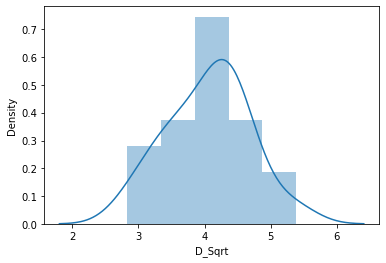

In [85]:
sns.distplot(Time['D_Sqrt']) #Shows better distribution and less skew in data

/home/prathikm/miniconda3/envs/ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='S_Sqrt', ylabel='Density'>

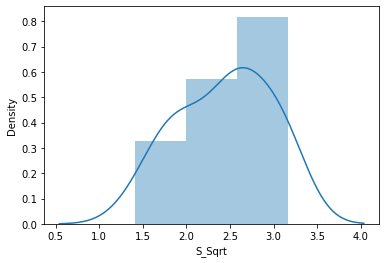

In [86]:
sns.distplot(Time['S_Sqrt']) #Shows better distribution and less skew in data

### Fitting the model

In [88]:
smf.ols("D_Sqrt~S_Sqrt", data=Time).fit()

In [89]:
model = smf.ols("D_Sqrt~S_Sqrt", data=Time).fit()

### Checking the line plot

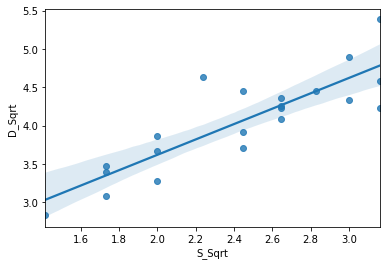

In [90]:
sns.regplot(x="S_Sqrt", y="D_Sqrt", data=Time);

### Getting the Beta 0 and Beta 1

In [91]:
model.params

Intercept    1.613479
S_Sqrt       1.002217
dtype: float64

### Predicting the delivery time say for sorting time 15

In [92]:
newdata=pd.Series([2]) #Converting to Series Object

In [96]:
data_pred=pd.DataFrame(newdata,columns=['S_Sqrt'])

In [97]:
data_pred

,S_Sqrt
0,2


In [98]:
model.predict(data_pred) #Predicted value

0    3.617912
dtype: float64

### Coefficient of determination

In [99]:
model.rsquared

0.7292011987544664

# 0.729 is good accuracy of the model.

In [ ]:
#---------------

## 2. Log Transformation - We get accuracy 0.7721

In [100]:
Time.insert(len(Time.columns), 'D_log', np.log(Time2.iloc[:,0]))
Time.insert(len(Time.columns), 'S_log', np.log(Time2.iloc[:,1]))

In [101]:
Time3 = Time

In [107]:
Time3.head()

,Delivery_Time,Sorting_Time,D_Sqrt,S_Sqrt,D_log,S_log
0,21.00,10,4.582576,3.162278,3.044522,2.302585
1,13.50,4,3.674235,2.000000,2.602690,1.386294
2,19.75,6,4.444097,2.449490,2.983153,1.791759
3,24.00,9,4.898979,3.000000,3.178054,2.197225
4,29.00,10,5.385165,3.162278,3.367296,2.302585


In [102]:
Time3.corr()

,Delivery_Time,Sorting_Time,D_Sqrt,S_Sqrt,D_log,S_log
Delivery_Time,1.000000,0.825997,0.995301,0.834150,0.981502,0.833933
Sorting_Time,0.825997,1.000000,0.839077,0.994704,0.843177,0.977447
D_Sqrt,0.995301,0.839077,1.000000,0.853933,0.995391,0.860662
S_Sqrt,0.834150,0.994704,0.853933,1.000000,0.864774,0.993904
D_log,0.981502,0.843177,0.995391,0.864774,1.000000,0.878727
S_log,0.833933,0.977447,0.860662,0.993904,0.878727,1.000000


/home/prathikm/miniconda3/envs/ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='D_log', ylabel='Density'>

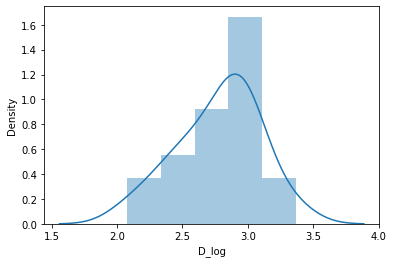

In [104]:
sns.distplot(Time3['D_log']) #Shows better distribution and less skew in data

/home/prathikm/miniconda3/envs/ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='S_log', ylabel='Density'>

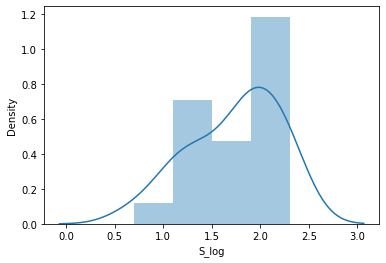

In [105]:
sns.distplot(Time3['S_log']) #Shows better distribution and less skew in data

In [108]:
smf.ols("D_log~S_log", data=Time3).fit()
model = smf.ols("D_log~S_log", data=Time3).fit()
model.params
newdata=pd.Series([2.30]) #Converting to Series Object
data_pred=pd.DataFrame(newdata,columns=['S_log'])
data_pred
model.predict(data_pred) #Predicted value
model.rsquared

0.77216134926874

# ---------------------------------------------------------------